[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/0xInode/AI-study-notes/blob/main/ml/hands-on-ml/chapter05/chapter05.ipynb)


# Support Vector Machines

**서포트 벡터 머신(SVM)**: 선형 또는 비선형 분류, 회귀, 이상치 탐지까지 수행  
복잡한 소규모 또는 중간 규모 데이터셋의 분류에 특히 적합

## Set up

In [2]:
import sys

assert sys.version_info >= (3, 7)

In [3]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [6]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "svm"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [4]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

## Linear SVM Classification

**선형 SVM 분류 (Linear SVM Classification)**

아래 그래프에서는 4장 끝부분에서 나온 iris 데이터셋의 일부를 보여 줌

두 클래스는 명확히 직선으로 쉽게 분리됨(선형적으로 구분 가능)

왼쪽 그림에서는 세 개의 가능한 선형 분류기의 결정 경계(decision boundary)

점선으로 표시된 모델은 너무 형편없어서 클래스조차 제대로 구분하지 못함

나머지 두 모델은 학습 데이터에 대해 완벽하게 작동하지만,  
결정 경계가 데이터 인스턴스에 너무 가까워서  
→ 새로운 데이터에 대해서는 성능이 떨어질 가능성이 높음

이에 비해, 오른쪽 그림의 실선으로 표시된 SVM 분류기의 결정 경계는  
두 클래스를 나누면서도 가장 가까운 훈련 인스턴스로부터 최대한 멀리 떨어져 있음

SVM 분류기는 두 클래스를 가로지르는
가장 넓은 도로(widest possible street)를 찾는 것처럼 작동  
(도로의 양 옆은 평행한 점선으로 나타남)

이를 **Large Margin Classification (큰 여백 분류)** 라고 함

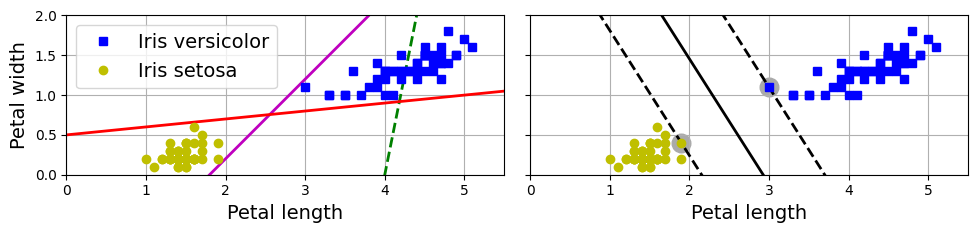

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn import datasets

# 데이터 불러오기 (아이리스 중 setosa vs versicolor만 사용)
iris = datasets.load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target
setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# 선형 SVM 분류기 학습
svm_clf = SVC(kernel="linear", C=1e100)
svm_clf.fit(X, y)

# 성능이 안 좋은 분류기 예시
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5 * x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

# SVM 결정 경계 및 마진 시각화 함수
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0] / w[1] * x0 - b / w[1]
    margin = 1 / w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    svs = svm_clf.support_vectors_

    plt.plot(x0, decision_boundary, "k-", linewidth=2)         # 결정 경계
    plt.plot(x0, gutter_up, "k--", linewidth=2)                # 위쪽 마진
    plt.plot(x0, gutter_down, "k--", linewidth=2)              # 아래쪽 마진
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#AAA') # 서포트 벡터

# 시각화
fig, axes = plt.subplots(ncols=2, figsize=(10, 2.7), sharey=True)

# 왼쪽: 잘못된 분류기 예시들
plt.sca(axes[0])
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.axis([0, 5.5, 0, 2])
plt.gca().set_aspect("equal")
plt.grid()

# 오른쪽: SVM의 large margin 분류기
plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length")
plt.axis([0, 5.5, 0, 2])
plt.gca().set_aspect("equal")
plt.grid()

save_fig("large_margin_classification_plot")  # 그림 저장 함수 (정의돼 있어야 작동함)
plt.show()


도로(street) 바깥에 더 많은 훈련 샘플을 추가하더라도 결정 경계에는 전혀 영향을 주지 않음  
→ 결정 경계는 도로의 경계에 위치한 샘플들만으로 완전히 결정됨(또는 지지됨)  
→ 이러한 샘플들을 **서포트 벡터(support vectors)** 라고 부름(위 그림의 원)

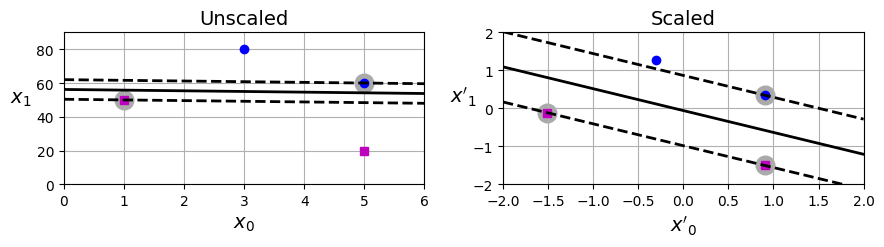

In [10]:
from sklearn.preprocessing import StandardScaler

# 간단한 2D 샘플 데이터 (x0, x1)
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])  # 클래스 라벨

# 스케일링 없이 선형 SVM 학습
svm_clf = SVC(kernel="linear", C=100).fit(Xs, ys)

# 특성 스케일 조정 (표준화)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)

# 스케일링된 데이터로 선형 SVM 재학습
svm_clf_scaled = SVC(kernel="linear", C=100).fit(X_scaled, ys)

plt.figure(figsize=(9, 2.7))

# 왼쪽: 스케일 조정 전
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")  # 클래스 1
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")  # 클래스 0
plot_svc_decision_boundary(svm_clf, 0, 6)         # 결정 경계 시각화
plt.xlabel("$x_0$")
plt.ylabel("$x_1$    ", rotation=0)
plt.title("Unscaled")  # 스케일 조정 전
plt.axis([0, 6, 0, 90])
plt.grid()

# 오른쪽: 스케일 조정 후
plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf_scaled, -2, 2)
plt.xlabel("$x'_0$")
plt.ylabel("$x'_1$  ", rotation=0)
plt.title("Scaled")  # 스케일 조정 후
plt.axis([-2, 2, -2, 2])
plt.grid()

save_fig("sensitivity_to_feature_scales_plot")  # 그림 저장
plt.show()


SVM은 특성 스케일(feature scale)에 민감함

왼쪽 그림에서는 세로 축 범위가 가로 축보다 훨씬 큼  
→ 따라서 가능한 가장 넓은 도로는 수평에 가깝게 형성됨

Scikit-Learn의 StandardScaler 같은 방법으로 특성 스케일을 조정한 뒤에는  
→ 오른쪽 그림처럼 결정 경계가 훨씬 더 적절하게 보임

### Soft Margin Classification

**하드 마진 분류(hard margin classification)**: 모든 샘플이 도로(street) 바깥에 있어야 하고, 또한 올바른 쪽에 위치해야 한다는 조건을 엄격하게 적용

하드 마진 분류의 두 가지 문제
1. 데이터가 선형적으로 완벽히 분리(linearly separable) 되어 있어야만 작동함
2. 이상치(outlier)에 매우 민감함

다음 그림에서는 아이리스 데이터셋에 이상치 한 개만 추가된 상황을 보여 줌



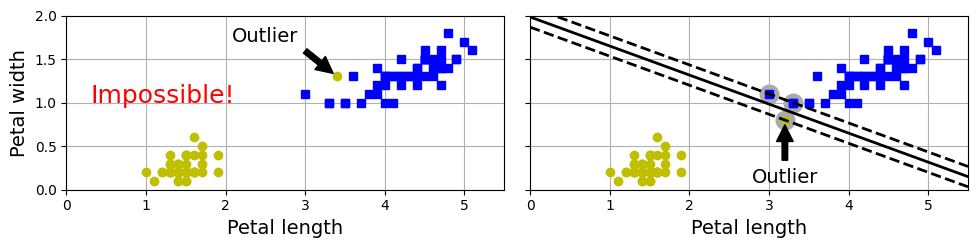

In [11]:
# 이상치(outlier) 2개 추가
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])

# 첫 번째 이상치만 포함 (하드 마진 불가능한 경우)
Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)

# 두 번째 이상치만 포함 (마진이 왜곡되는 경우)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

# 하드 마진 SVM 학습
svm_clf2 = SVC(kernel="linear", C=10**9)
svm_clf2.fit(Xo2, yo2)

fig, axes = plt.subplots(ncols=2, figsize=(10, 2.7), sharey=True)

# 왼쪽: 이상치 때문에 완벽 분리가 불가능한 상황
plt.sca(axes[0])
plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], "bs")
plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "yo")
plt.text(0.3, 1.0, "Impossible!", color="red", fontsize=18)
plt.annotate("Outlier", xy=(X_outliers[0][0], X_outliers[0][1]),
             xytext=(2.5, 1.7), ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.axis([0, 5.5, 0, 2])
plt.grid()

# 오른쪽: 이상치로 인해 결정 경계가 크게 왜곡된 경우
plt.sca(axes[1])
plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.annotate("Outlier", xy=(X_outliers[1][0], X_outliers[1][1]),
             xytext=(3.2, 0.08), ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.xlabel("Petal length")
plt.axis([0, 5.5, 0, 2])
plt.grid()

save_fig("sensitivity_to_outliers_plot")
plt.show()


왼쪽 그림에서는 하드 마진을 만족하는 분류 경계를 찾을 수 없음

오른쪽 그림에서는 결정 경계가 이상치의 영향으로 많이 달라짐  
→ 아까 그림에서 봤던 결정 경계와는 매우 다름  
→ 결과적으로 일반화 성능이 나빠질 가능성이 높음

이러한 문제들을 피하기 위해서는 좀 더 유연한 모델을 사용하는 것이 좋음
목표는 다음 두 가지 사이의 좋은 균형을 찾는 것:

1. 도로(street)를 최대한 넓게 유지함
2. 마진 위반(margin violation)을 줄임  
→ 즉, 샘플이 도로 한가운데나 잘못된 쪽에 위치하는 상황 제한

이러한 방식을 **소프트 마진 분류(soft margin classification)**



In [12]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

# 아이리스 데이터 불러오기
iris = load_iris(as_frame=True)

# 특성: 꽃잎 길이와 너비 / 타깃: Iris virginica 여부 (이진 분류)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 2)  # virginica면 True, 아니면 False

# SVM 분류기 구성: 표준화 + 선형 SVM
svm_clf = make_pipeline(StandardScaler(),
                        LinearSVC(C=1, dual=True, random_state=42))

# 모델 학습
svm_clf.fit(X, y)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, dual=True, random_state=42))])

In [13]:
X_new = [[5.5, 1.7], [5.0, 1.5]]  # 예측에 사용할 새로운 꽃잎 길이/너비 샘플
svm_clf.predict(X_new)           # 각 샘플이 Iris virginica인지 예측 (True/False)


array([ True, False])

In [15]:
svm_clf.decision_function(X_new)  # 각 샘플에 대한 결정 점수 출력 (양수면 클래스 1, 음수면 클래스 0)


array([ 0.66163411, -0.22036063])

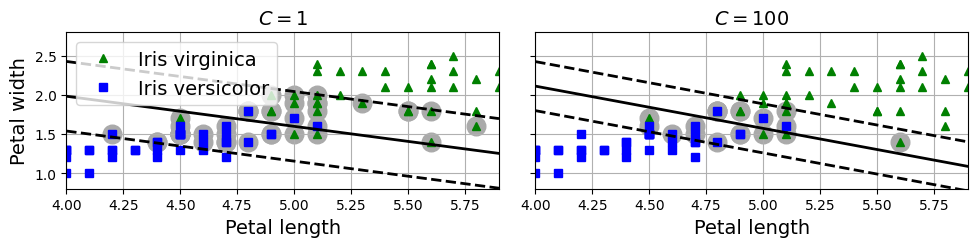

In [18]:
# 표준화 + 서로 다른 C 값을 가진 SVM 모델 생성
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, max_iter=10_000, dual=True, random_state=42)
svm_clf2 = LinearSVC(C=100, max_iter=10_000, dual=True, random_state=42)

# 파이프라인 구성
scaled_svm_clf1 = make_pipeline(scaler, svm_clf1)
scaled_svm_clf2 = make_pipeline(scaler, svm_clf2)

# 모델 학습 (스케일링 포함)
scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

# 스케일링 되지 않은 공간에서 파라미터 계산 (해석용)
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# LinearSVC는 서포트 벡터 정보를 제공하지 않으므로 직접 계산
t = y * 2 - 1  # 클래스: 0 → -1, 1 → +1
support_vectors_idx1 = (t.to_numpy() * (X.dot(w1) + b1) < 1)
support_vectors_idx2 = (t.to_numpy() * (X.dot(w2) + b2) < 1)
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

# 결과 시각화
fig, axes = plt.subplots(ncols=2, figsize=(10, 2.7), sharey=True)

# C = 1 결과
plt.sca(axes[0])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 5.9)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.title(f"$C = {svm_clf1.C}$")
plt.axis([4, 5.9, 0.8, 2.8])
plt.grid()

# C = 100 결과
plt.sca(axes[1])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 5.99)
plt.xlabel("Petal length")
plt.title(f"$C = {svm_clf2.C}$")
plt.axis([4, 5.9, 0.8, 2.8])
plt.grid()

save_fig("regularization_plot")
plt.show()


Scikit-Learn에서 SVM 모델을 만들 때는 여러 하이퍼파라미터를 설정할 수 있는데
그중 하나가 C

- C를 작게 설정하면 → 위 그래프의 왼쪽처럼 나옴
- C를 크게 설정하면 → 오른쪽처럼 나옴

마진 위반은 바람직하지 않으므로 적을수록 좋음  
하지만 이 경우에는 왼쪽 모델이 마진 위반은 많지만, 일반화 성능은 더 좋을 가능성이 있음

만약 SVM 모델이 과적합(overfitting) 되고 있다면, C 값을 낮춰서 정규화(regularization) 하는 것을 시도할 수 있음

다음은 Scikit-Learn 코드로, 아이리스(iris) 데이터셋을 불러오고, 특성(feature)을 스케일링한 다음, 선형 SVM 모델(LinearSVC 클래스, C=1, hinge 손실 함수)을 사용해 Iris virginica 품종을 판별하는 훈련 수행



```
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # 꽃잎 길이와 너비
y = (iris["target"] == 2).astype(np.float64)  # Iris virginica인지 여부

svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge"))
])

svm_clf.fit(X, y)

```

이렇게 학습된 모델은 위 그래프 왼쪽에 시각화

예측

```
svm_clf.predict([[5.5, 1.7]])
# 결과: array([1.])

```

Logistic Regression과는 달리  
**SVM 분류기(SVM classifier)**는 각 클래스에 대한 확률을 출력하지 않음



- LinearSVC 대신 SVC 클래스 사용: SVC(kernel="linear", C=1)

- SGDClassifier 클래스 사용: SGDClassifier(loss="hinge", alpha=1/(m*C))

일반적인 확률적 경사 하강법(Stochastic Gradient Descent)을 사용하여 선형 SVM 분류기 학습

LinearSVC만큼 빠르게 수렴하진 않지만, 다음과 같은 상황에서 유용
- 온라인 분류(online classification)
- 메모리에 올릴 수 없을 정도로 큰 데이터셋 (out-of-core training)

LinearSVC 클래스는 **절편 항(bias term)**도 정규화(regulazation)함  
따라서 훈련 세트를 평균 중심으로 이동(center)시켜야  
→ StandardScaler를 사용하면 자동으로 처리됨

loss 하이퍼파라미터는 기본값이 "hinge"가 아니기 때문에 명시적으로 지정해야 함

그리고 더 나은 성능을 위해서는 dual=False로 설정하는 것이 좋음  
특성 수가 훈련 샘플 수보다 많을 경우에는 예외(이건 뒤에서 다룸)

## Nonlinear SVM Classification

### Polynomial Kernel

### Similarity Features

### Gaussian RBF Kernel


### Computational Complexity

## SVM Regression

## Under the Hood

### Decision Function and Predictions

### Training Objective

### Quadratic Programming

### The Dual Problem

### Kernelized SVMs


### Online SVMs